# Task 1 : Analytical Question 

Question:- 

What are the key factors that influence customer purchase decisions in the UK e-commerce market?

Answer:-

The dataset could be examined to identify different variables, such as product attributes (such as price, brand, category), customer demographics (such as age, gender, location), and transaction characteristics (such as time of purchase, order value, payment method), that may affect customer purchase decisions in order to provide an answer to this question. These variables could be examined for patterns and correlations to learn which variables significantly influence client purchasing decisions in the UK e-commerce market. To better meet the interests and wants of UK e-commerce customers, this could help businesses optimise their marketing and sales tactics, customise their product offerings, and improve the overall customer experience.

# Task 2 : Data Analysis

In [1]:
#importing the required Python Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go

%matplotlib inline

In [3]:
from google.colab import files #this code is used to load data on google collab
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
#Loding the dataset and storing it into a Dataframe callled df

df = pd.read_csv("data.csv" ,encoding= 'unicode_escape')



Analysing the Dataset before proceeding to EDA, Data Preprocessing and Implenting the Machine Learing Algorithm

In [5]:
#Checking information about the pandas DataFrame df

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


From the above output we can see that:

1. There are a total of 541,909 rows (entries) in the DataFrame.
2. The DataFrame has 8 columns named 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', and 'Country'.
3. The 'Description' column has 540,455 non-null values, meaning there are some missing values in this column.
4. The 'CustomerID' column has 406,829 non-null values, indicating that there are missing values in this column as well.
5. The 'InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', and 'Country' columns are of object (string) data type.
6. The 'Quantity' column is of int64 data type, representing integer values.
7. The 'UnitPrice' and 'CustomerID' columns are of float64 data type, representing floating-point numbers.
8. The total memory usage of the DataFrame is 33.1+ MB.

In [6]:

#Getting first few rows of the DataFrame by using head method
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
#generating the descriptive statistics of the Pandas DataFrame df using 'describe' method
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#checking for null values in the dataset

df.isnull().values.any()

True

From the above output we can see that there are null values in the dataset as we are getting TRUE as result

In [10]:
# Now checking the number of missing values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
#Checking duplicated data
df.duplicated().sum()


0

In [14]:
# removing the duplicate rows
df = df[~df.duplicated()]
df.shape

(536641, 8)

In [15]:
#converting CustomerID(Float) to (String) then remove .0 in the last of string
df['CustomerID'] = df['CustomerID'].apply(lambda x : str(x)[:-2])

In [16]:
#checking if the .0 is removed for not from Customer ID
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [17]:
#this code returns the first few rows of the DataFrame df where the 'CustomerID' column does not contain any digits

df[~df['CustomerID'].str.contains('\d+')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,n,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,n,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,n,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,n,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,n,United Kingdom


We can answer this question by analysing this Dataset

1. Which goods sold most frequently?
2. What is the (Average) Invoice for Each Country?
3. Where The Most Data Is Sourced
4. Which Stock_Code is the most popular?
5. Which year did we earn the most money?
6. What month, on average, is the best? which is something we excel at.


In [18]:
# retrieving all the unique values present in Description column.
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [19]:
#handling the Null Values
df['Description'].fillna('Missings' , inplace = True)

In [20]:
df[df['Description'].str.contains('\w+')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


If we look at above code,we can notice that we figured out an important thing which is ,if we look at the shape above we can notice that is (5336586× 8)  ,But we know that the Original Shape is(5336641,8) , so by doing some regex we figured out that there is a Nulls Values different from what we filled it later

In [21]:

df[~df['Description'].str.contains('\w+')].head()

#filtering out rows in the dataframe df where the "Description" column does not contain any word characters (letters, digits, or underscores), and retrieving the first few rows of the resulting filtered dataframe for further analysis or processing.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,n,United Kingdom
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,n,United Kingdom
38261,539494,21479,?,752,12/20/2010 10:36,0.0,n,United Kingdom
43662,540100,22837,?,-106,1/4/2011 16:53,0.0,n,United Kingdom
50806,540558,21258,?,-29,1/10/2011 10:04,0.0,n,United Kingdom


In [22]:
df['Description'] = df['Description'].apply(lambda x : x.replace('?',"Missings"))
df[~df['Description'].str.contains('\w+')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
# To Avoid a Problem ,Which is may be we have MILK and milk , and it is obvious we do not need to treat it 
# as a 2 different products, so We Need to handle it 
df['Description'] = df['Description'].apply(lambda x : x.lower())
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850,United Kingdom


In [24]:
#Grouping the DataFrame 'df' by the values in the 'Description' column
df.groupby('Description')['Quantity'].sum().sort_values()[:5]


Description
printing smudges/thrown away   -28258
unsaleable, destroyed.         -15644
missings                       -14993
check                          -12164
damaged                         -9173
Name: Quantity, dtype: int64

In [25]:
# Let us remove every row has a UnitPrice = 0 
df[df['Description']=='missings'].sort_values(by = 'Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
341601,566768,16045,missings,-3667,9/14/2011 17:53,0.0,n,United Kingdom
323458,565304,16259,missings,-3167,9/2/2011 12:18,0.0,n,United Kingdom
270886,560600,18007,missings,-2834,7/19/2011 17:04,0.0,n,United Kingdom
156350,550133,85099F,missings,-1092,4/14/2011 13:49,0.0,n,United Kingdom
285886,561927,22740,missings,-1060,8/1/2011 12:49,0.0,n,United Kingdom
...,...,...,...,...,...,...,...,...
82795,543258,84611B,missings,1287,2/4/2011 16:06,0.0,n,United Kingdom
74615,542505,79063D,missings,2560,1/28/2011 12:04,0.0,n,United Kingdom
115807,546139,84988,missings,3000,3/9/2011 16:35,0.0,n,United Kingdom
220843,556231,85123A,missings,4000,6/9/2011 15:04,0.0,n,United Kingdom


In [26]:
# simply I got every row has price = 0 ,then i threw it away and took the rest
df = df[~(df['UnitPrice']==0)].sort_values(by = 'UnitPrice')
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,adjust bad debt,1,8/12/2011 14:51,-11062.060,n,United Kingdom
299984,A563187,B,adjust bad debt,1,8/12/2011 14:52,-11062.060,n,United Kingdom
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom
...,...,...,...,...,...,...,...,...
15016,C537630,AMAZONFEE,amazon fee,-1,12/7/2010 15:04,13541.330,n,United Kingdom
43703,C540118,AMAZONFEE,amazon fee,-1,1/5/2011 9:57,16453.710,n,United Kingdom
43702,C540117,AMAZONFEE,amazon fee,-1,1/5/2011 9:55,16888.020,n,United Kingdom
524602,C580605,AMAZONFEE,amazon fee,-1,12/5/2011 11:36,17836.460,n,United Kingdom


In [27]:
# slicing a DataFrame object "df" to exclude the first two rows using integer-based indexing, and then displaying the remaining rows using df.head() method.
df = df.iloc[2:]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom
108088,C545478,D,discount,-720,3/3/2011 11:08,0.010,16422,United Kingdom


In [28]:
# if we look to the last row , we have a Quantity = -720 , let's figure out what it is
df[df['Description']=='discount'].sort_values(by = 'Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
108088,C545478,D,discount,-720,3/3/2011 11:08,0.01,16422,United Kingdom
182729,C552569,D,discount,-240,5/10/2011 12:06,0.03,12901,United Kingdom
226396,C556796,D,discount,-96,6/14/2011 14:40,0.70,16013,United Kingdom
196362,C553841,D,discount,-48,5/19/2011 12:19,0.20,16029,United Kingdom
183138,C552650,D,discount,-18,5/10/2011 14:03,1.45,16672,United Kingdom
...,...,...,...,...,...,...,...,...
479867,C577227,D,discount,-1,11/18/2011 12:06,14.88,14527,United Kingdom
140795,C548462,D,discount,-1,3/31/2011 12:11,14.52,14527,United Kingdom
323492,C565313,D,discount,-1,9/2/2011 12:41,14.50,14527,United Kingdom
422377,C573081,D,discount,-1,10/27/2011 14:20,23.27,14527,United Kingdom


Answer to the First Question

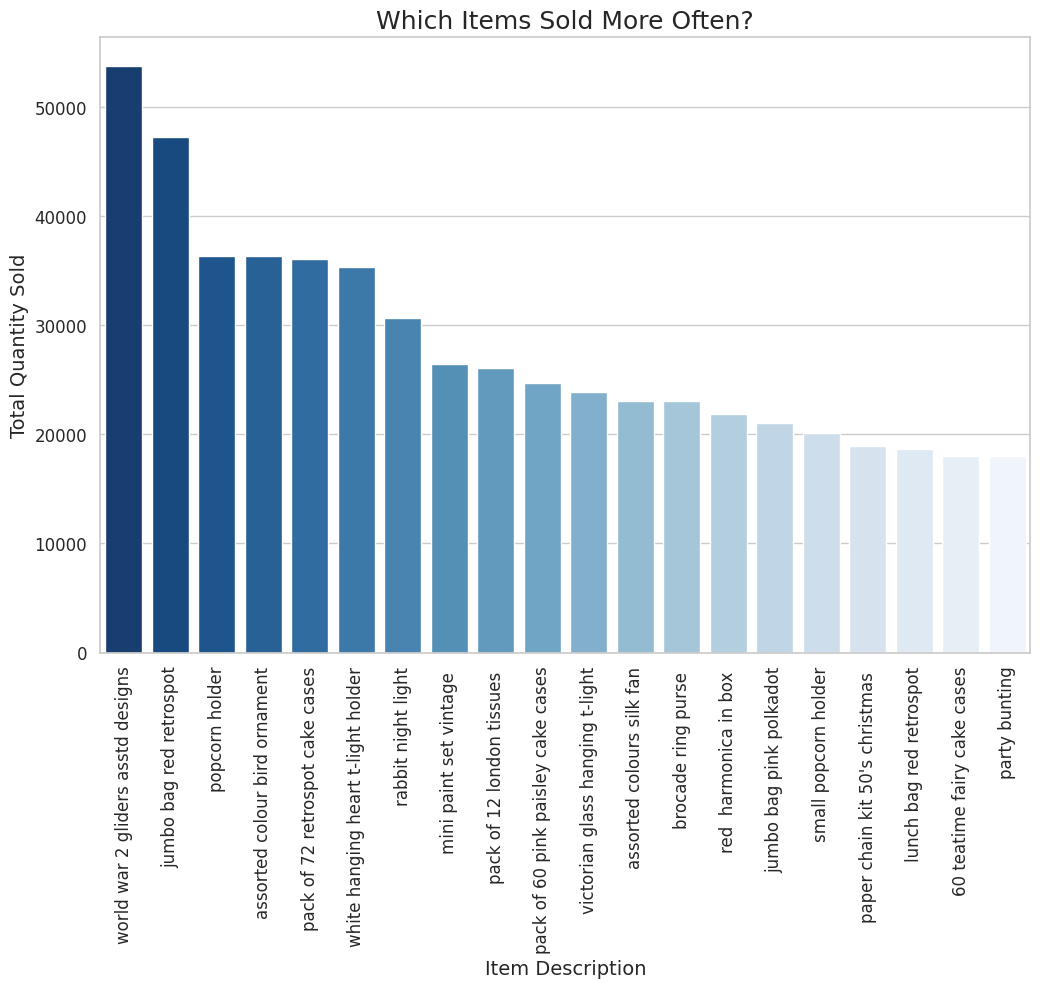

In [29]:
# Groupby 'Description' column, sum 'Quantity' values, and sort in descending order
items = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:20]

# Set custom color palette
custom_palette = sns.color_palette("Blues_r", n_colors=20)  # Change the color palette to 'Blues_r' with 20 colors

# Create bar plot
sns.set(style="whitegrid")  # Set the style to whitegrid
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=items.index, y=items.values, palette=custom_palette)  # Set custom color palette
plt.title("Which Items Sold More Often?", fontsize=18)  # Set title and font size
plt.xticks(rotation=90, fontsize=12)  # Set x-axis rotation and font size
plt.yticks(fontsize=12)  # Set y-axis font size
plt.xlabel("Item Description", fontsize=14)  # Set x-axis label and font size
plt.ylabel("Total Quantity Sold", fontsize=14)  # Set y-axis label and font size
plt.show()


Answer to Question 2



In [30]:
# We Need To make Extra Column called (Sales)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom
108088,C545478,D,discount,-720,3/3/2011 11:08,0.010,16422,United Kingdom


In [31]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df

<ipython-input-31-3e98aedc4235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom,0.001
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom,0.001
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom,0.001
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom,0.001
108088,C545478,D,discount,-720,3/3/2011 11:08,0.010,16422,United Kingdom,-7.200
...,...,...,...,...,...,...,...,...,...
15016,C537630,AMAZONFEE,amazon fee,-1,12/7/2010 15:04,13541.330,n,United Kingdom,-13541.330
43703,C540118,AMAZONFEE,amazon fee,-1,1/5/2011 9:57,16453.710,n,United Kingdom,-16453.710
43702,C540117,AMAZONFEE,amazon fee,-1,1/5/2011 9:55,16888.020,n,United Kingdom,-16888.020
524602,C580605,AMAZONFEE,amazon fee,-1,12/5/2011 11:36,17836.460,n,United Kingdom,-17836.460


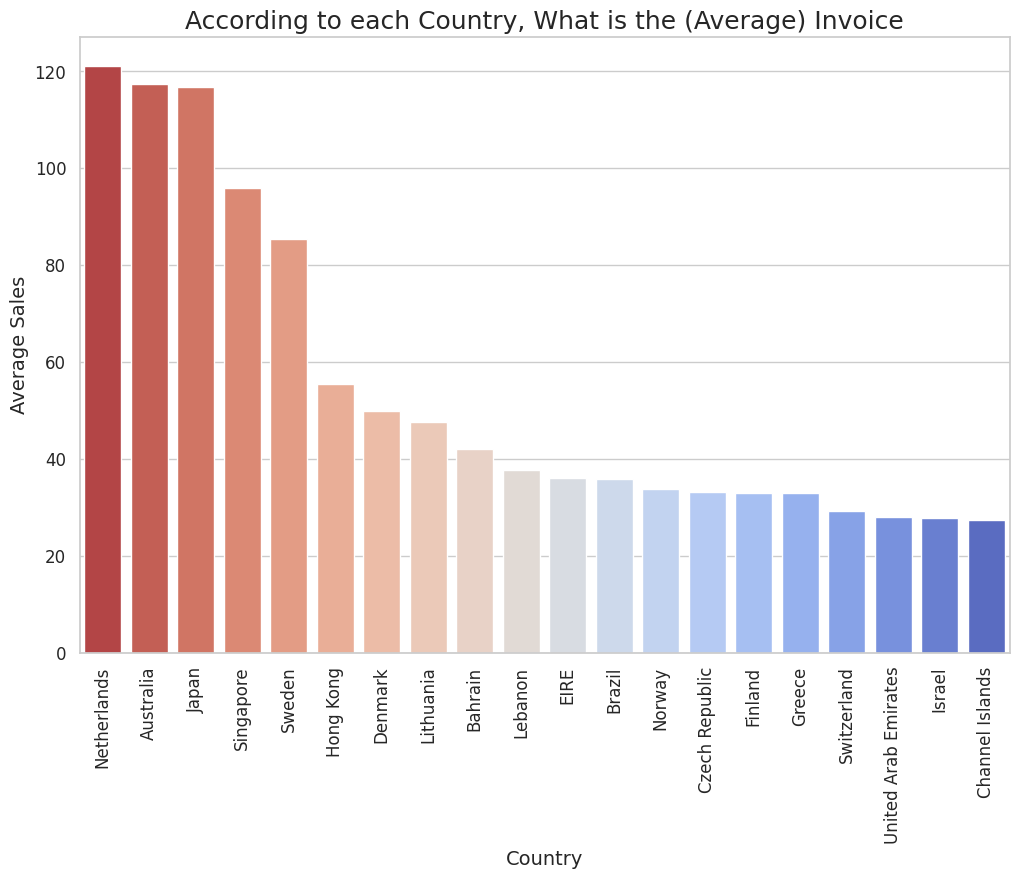

In [32]:
# Filter the DataFrame to include only rows with positive 'Sales' values
filtered_df = df[df['Sales'] > 0]

# Groupby 'Country' column, calculate mean 'Sales' values, and sort in descending order
countries = filtered_df.groupby('Country')['Sales'].mean().sort_values(ascending=False)[:20]

# Set custom color palette
custom_palette = sns.color_palette("coolwarm_r", n_colors=20)  # Change the color palette to 'coolwarm_r' with 20 colors

# Create bar plot
sns.set(style="whitegrid")  # Set the style to whitegrid
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=countries.index, y=countries.values, palette=custom_palette)  # Set custom color palette
plt.title("According to each Country, What is the (Average) Invoice", fontsize=18)  # Set title and font size
plt.xticks(rotation=90, fontsize=12)  # Set x-axis rotation and font size
plt.yticks(fontsize=12)  # Set y-axis font size
plt.xlabel("Country", fontsize=14)  # Set x-axis label and font size
plt.ylabel("Average Sales", fontsize=14)  # Set y-axis label and font size
plt.show()


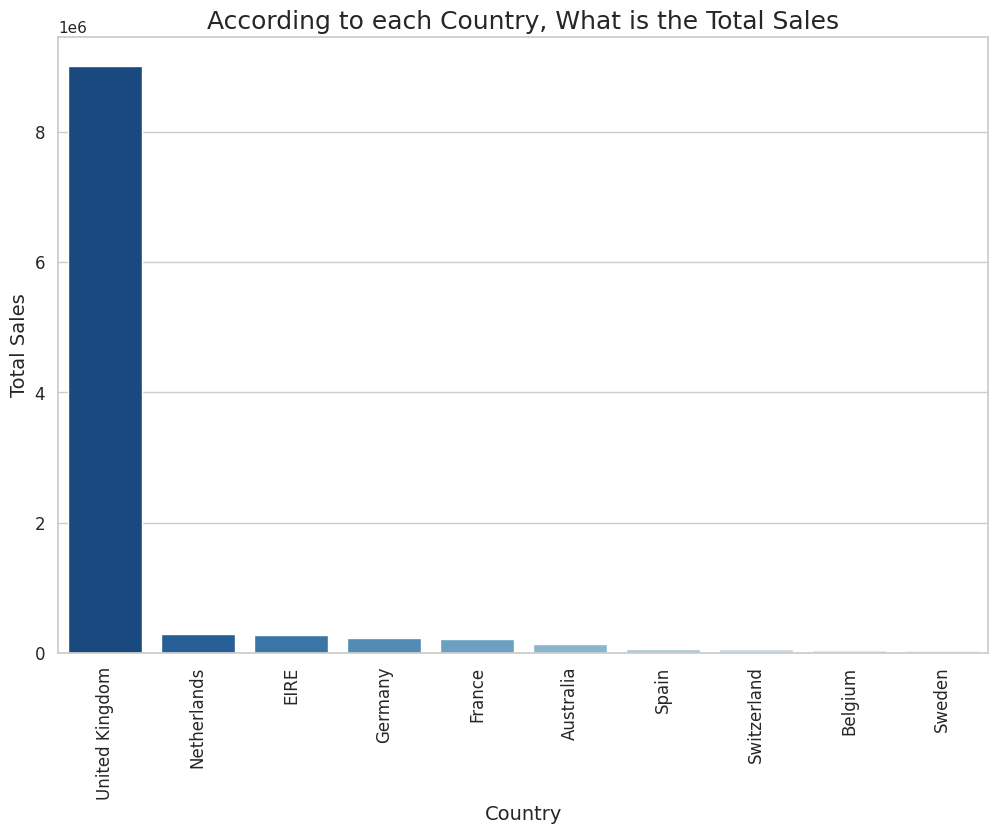

In [33]:
# Filter the DataFrame to include only rows with positive 'Sales' values
filtered_df = df[df['Sales'] > 0]

# Groupby 'Country' column, calculate sum of 'Sales' values, and sort in descending order
countries = filtered_df.groupby('Country')['Sales'].sum().sort_values(ascending=False)[:10]

# Set custom color palette
custom_palette = sns.color_palette("Blues_r", n_colors=10)  # Change the color palette to 'Blues_r' with 10 colors

# Create bar plot
sns.set(style="whitegrid")  # Set the style to whitegrid
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=countries.index, y=countries.values, palette=custom_palette)  # Set custom color palette
plt.title("According to each Country, What is the Total Sales", fontsize=18)  # Set title and font size
plt.xticks(rotation=90, fontsize=12)  # Set x-axis rotation and font size
plt.yticks(fontsize=12)  # Set y-axis font size
plt.xlabel("Country", fontsize=14)  # Set x-axis label and font size
plt.ylabel("Total Sales", fontsize=14)  # Set y-axis label and font size
plt.show()



Answer to Question 3


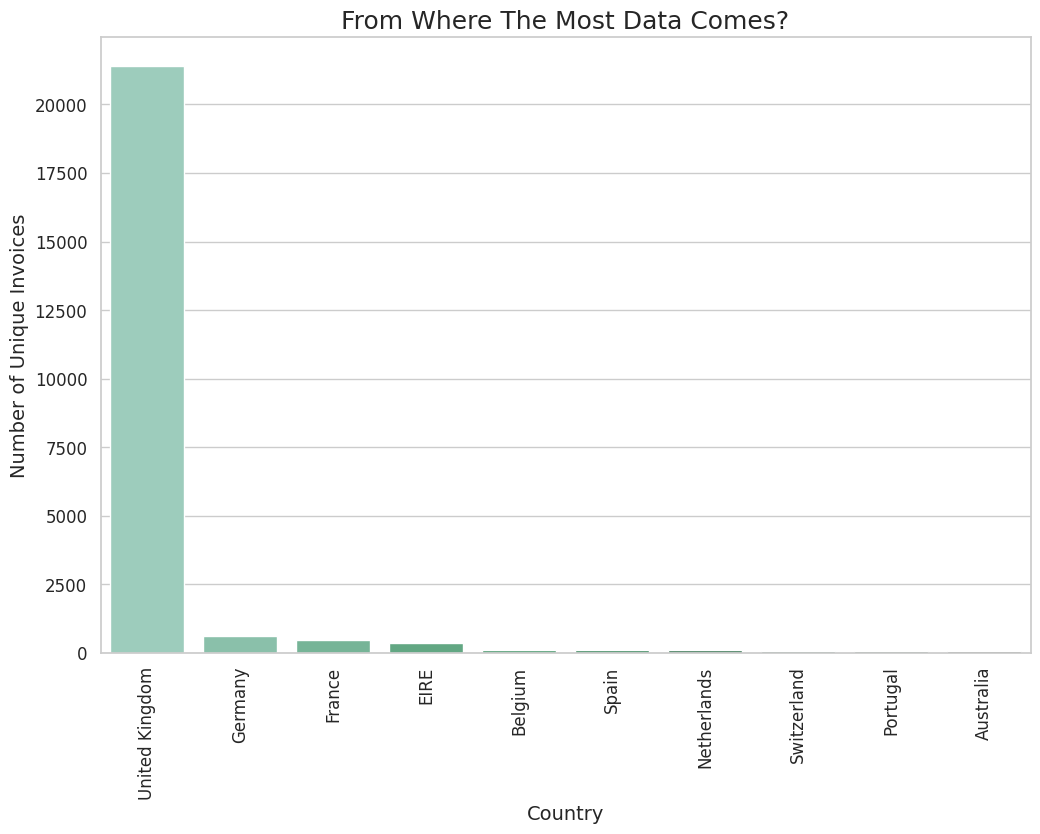

In [34]:
# Groupby 'Country' column, calculate the number of unique 'InvoiceNo' values, and sort in descending order
data_flow = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

# Set custom color palette
custom_palette = sns.color_palette("BuGn_d", n_colors=10)  # Change the color palette to 'BuGn_d' with 10 colors

# Create bar plot
sns.set(style="whitegrid")  # Set the style to whitegrid
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=data_flow.index, y=data_flow.values, palette=custom_palette)  # Set custom color palette
plt.title("From Where The Most Data Comes?", fontsize=18)  # Set title and font size
plt.xticks(rotation=90, fontsize=12)  # Set x-axis rotation and font size
plt.yticks(fontsize=12)  # Set y-axis font size
plt.xlabel("Country", fontsize=14)  # Set x-axis label and font size
plt.ylabel("Number of Unique Invoices", fontsize=14)  # Set y-axis label and font size
plt.show()


In [35]:
# Seems Like United Kingdom is an Outiler , Like we Knew that the Most of (Anything) comes from it 

data_flow

Country
United Kingdom    21391
Germany             603
France              461
EIRE                360
Belgium             119
Spain               105
Netherlands         100
Switzerland          74
Portugal             71
Australia            69
Name: InvoiceNo, dtype: int64

Answer to Question 4


In [36]:
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending = False)[:10]

StockCode
85123A    2240
22423     2168
85099B    2132
47566     1705
20725     1608
84879     1467
22720     1458
22197     1442
21212     1334
22383     1305
Name: InvoiceNo, dtype: int64

In [37]:
# if we looked at just value_counts it will lead us to a wrong conclusion
df['StockCode'].value_counts()[:10]
# if u look carefully to both output u will notice that is a different output

85123A    2295
22423     2187
85099B    2153
47566     1719
20725     1626
84879     1488
22197     1468
22720     1465
21212     1367
22383     1327
Name: StockCode, dtype: int64

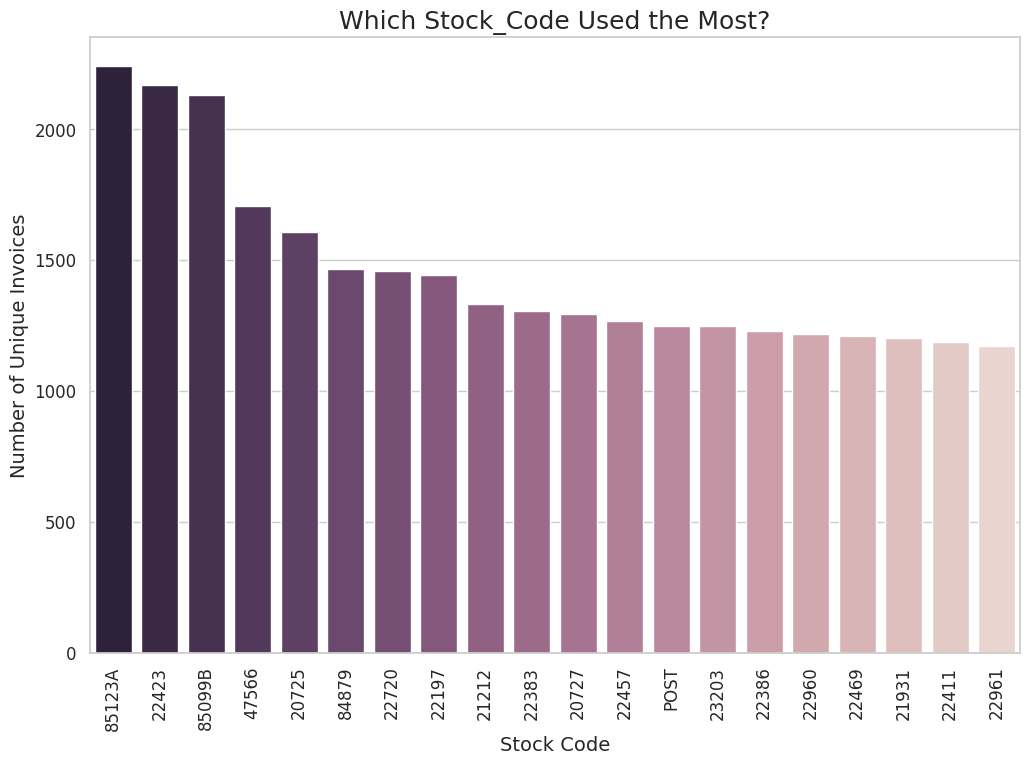

In [38]:


# Groupby 'StockCode' column, calculate the number of unique 'InvoiceNo' values, and sort in descending order
stock_codes = df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:20]

# Set custom color palette
custom_palette = sns.cubehelix_palette(20, reverse=True)  # Change the color palette to cubehelix with 20 colors and reverse the order

# Create bar plot
sns.set(style="whitegrid")  # Set the style to whitegrid
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=stock_codes.index, y=stock_codes.values, palette=custom_palette)  # Set custom color palette
plt.title("Which Stock_Code Used the Most?", fontsize=18)  # Set title and font size
plt.xticks(rotation=90, fontsize=12)  # Set x-axis rotation and font size
plt.yticks(fontsize=12)  # Set y-axis font size
plt.xlabel("Stock Code", fontsize=14)  # Set x-axis label and font size
plt.ylabel("Number of Unique Invoices", fontsize=14)  # Set y-axis label and font size
plt.show()


Answer to Question 5


In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

<ipython-input-39-ed322d355cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
279045,561226,PADS,pads to match all cushions,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001
359871,568200,PADS,pads to match all cushions,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0.001
157195,550193,PADS,pads to match all cushions,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001
361741,568375,BANK CHARGES,bank charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom,0.001
108088,C545478,D,discount,-720,2011-03-03 11:08:00,0.010,16422,United Kingdom,-7.200


In [40]:
df['Year'] = df['InvoiceDate'].apply(lambda x : x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x : x.month)
df.head()


<ipython-input-40-82e61e214deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].apply(lambda x : x.year)
<ipython-input-40-82e61e214deb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].apply(lambda x : x.month)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month
279045,561226,PADS,pads to match all cushions,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001,2011,7
359871,568200,PADS,pads to match all cushions,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0.001,2011,9
157195,550193,PADS,pads to match all cushions,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001,2011,4
361741,568375,BANK CHARGES,bank charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom,0.001,2011,9
108088,C545478,D,discount,-720,2011-03-03 11:08:00,0.010,16422,United Kingdom,-7.200,2011,3


In [41]:
sales_per_year = df.groupby('Year')['Sales'].sum().sort_values(ascending = False)
sales_per_year
# I didn't Know it was just two years :) , but u got my point

Year
2011    9001407.464
2010     746723.610
Name: Sales, dtype: float64

Answer to Question 6


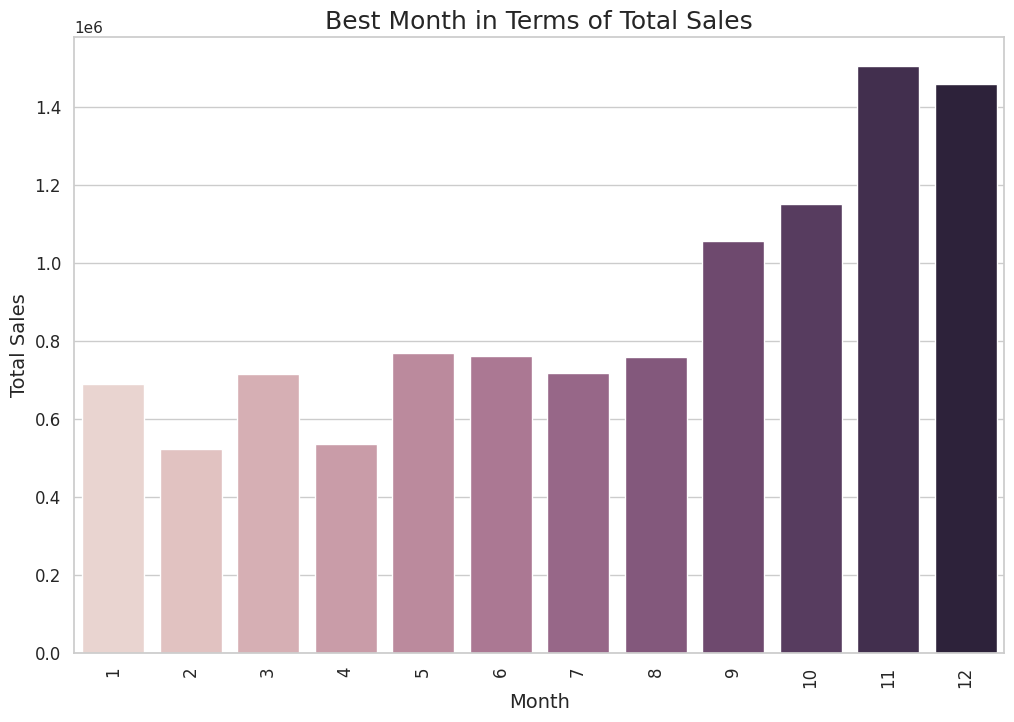

In [42]:

# Groupby 'Month' column, calculate the sum of 'Sales' values for months where 'Sales' > 0, and sort in descending order
sales_per_month = df[df['Sales'] > 0].groupby('Month')['Sales'].sum().sort_values(ascending=False)

# Set custom color palette
custom_palette = sns.cubehelix_palette(12)  # Change the color palette to cubehelix with 12 colors

# Create bar plot
sns.set(style="whitegrid")  # Set the style to whitegrid
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=custom_palette)  # Set custom color palette
plt.title("Best Month in Terms of Total Sales", fontsize=18)  # Set title and font size
plt.xticks(rotation=90, fontsize=12)  # Set x-axis rotation and font size
plt.yticks(fontsize=12)  # Set y-axis font size
plt.xlabel("Month", fontsize=14)  # Set x-axis label and font size
plt.ylabel("Total Sales", fontsize=14)  # Set y-axis label and font size
plt.show()


# More Exploratory Data Analysis

In [43]:

# converting invoicedate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# creating a new column with year and month
df['yearmonth'] = df['InvoiceDate'].dt.to_period('M')

# grouping by yearmonth and counting the number of unique invoices
orders_by_month = df.groupby('yearmonth')['InvoiceNo'].nunique().reset_index()

# createing a line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=orders_by_month['yearmonth'].apply(lambda x: x.strftime('%Y-%m')), y=orders_by_month['InvoiceNo'], mode='lines'))
fig.update_layout(title='Total Number of Orders by Month', xaxis_title='Month', yaxis_title='Number of Orders')
fig.show()


<ipython-input-43-510e5fa90176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-43-510e5fa90176>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearmonth'] = df['InvoiceDate'].dt.to_period('M')


In [44]:


# Group by CustomerID and count the number of unique invoices
orders_by_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Sort in descending order and get the top 10 customers
top_customers = orders_by_customer.sort_values(by='InvoiceNo', ascending=False).head(10)

# Define custom color for bars
bar_color = 'rgb(31, 119, 180)'

# Create a bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_customers['CustomerID'],
    y=top_customers['InvoiceNo'],
    marker_color=bar_color
))
fig.update_layout(
    title='Top 10 Customers with the Most Number of Orders',
    xaxis_title='Customer ID',
    yaxis_title='Number of Orders',
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    font=dict(color='black')  # Set font color
)
fig.show()


In [45]:


# Group data by CustomerID and calculate total amount spent
amount_spent = df.groupby('CustomerID')['Sales'].sum().reset_index()

# Sort values in descending order and select top 10
top_10_spent = amount_spent.sort_values('Sales', ascending=False)[:10]

# Define custom color for bars
bar_color = 'rgb(44, 160, 44)'

# Create a bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_spent['CustomerID'],
    y=top_10_spent['Sales'],
    marker_color=bar_color
))
fig.update_layout(
    title='Top 10 Customers by Total Amount Spent',
    xaxis_title='Customer ID',
    yaxis_title='Total Amount Spent',
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    font=dict(color='black')  # Set font color
)
fig.show()


In [46]:


# Group data by year and month and calculate total number of orders
orders_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M')).count().reset_index()[['InvoiceDate', 'InvoiceNo']]
orders_by_month.rename(columns={'InvoiceNo': 'num_orders'}, inplace=True)

# Define custom color for bars
bar_color = 'rgb(31, 119, 180)'

# Create a bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=orders_by_month['InvoiceDate'],
    y=orders_by_month['num_orders'],
    marker_color=bar_color
))
fig.update_layout(
    title='Number of Orders by Month',
    xaxis_title='Month',
    yaxis_title='Number of Orders',
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    font=dict(color='black')  # Set font color
)
fig.show()


In [47]:


# Group the data by country and count the number of unique invoice numbers
orders_by_country = df.groupby('Country')['InvoiceNo'].nunique().reset_index(name='num_orders')
orders_by_country = orders_by_country.sort_values('num_orders', ascending=False)

# Define custom color for bars
bar_color = 'rgb(31, 119, 180)'

# Create a bar chart using Plotly
fig = go.Figure(go.Bar(
    x=orders_by_country['Country'],
    y=orders_by_country['num_orders'],
    marker_color=bar_color
))
fig.update_layout(
    title='Total Number of Orders by Country',
    xaxis_title='Countries',
    yaxis_title='Number of Orders',
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    font=dict(color='black')  # Set font color
)
fig.show()


In [48]:
#creating some columns for understandable exploratory...
#Firstly we will create a new column as total value according to the unit price and quantity purchased.

df['Amount'] = df['Quantity']*df['UnitPrice']

<ipython-input-48-e8891caa1103>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



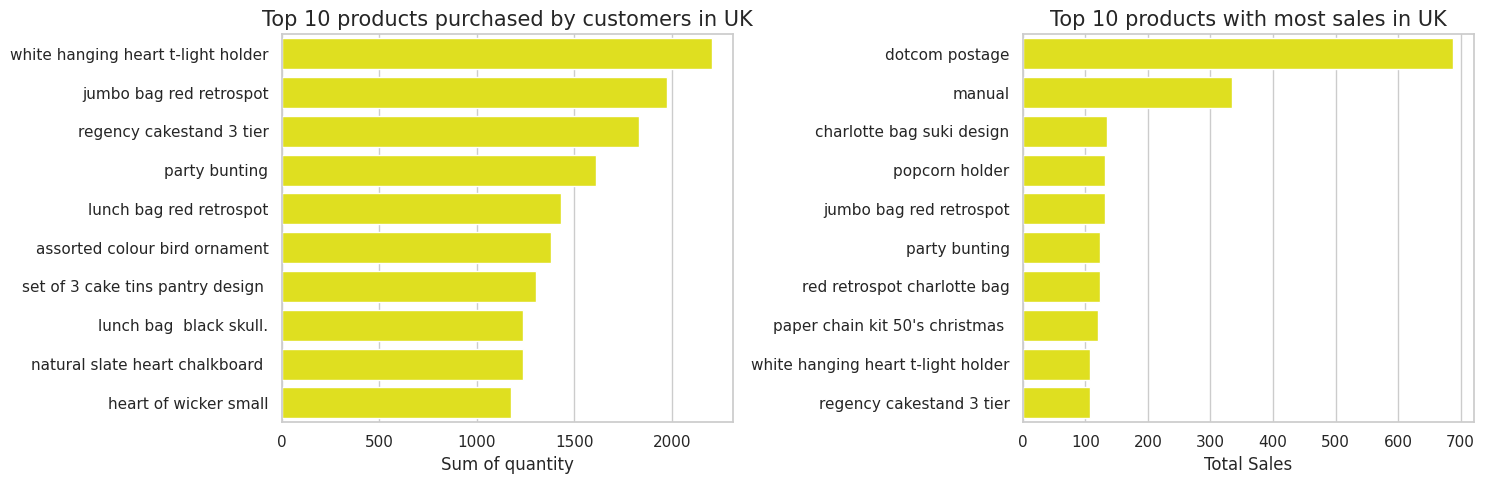

In [50]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

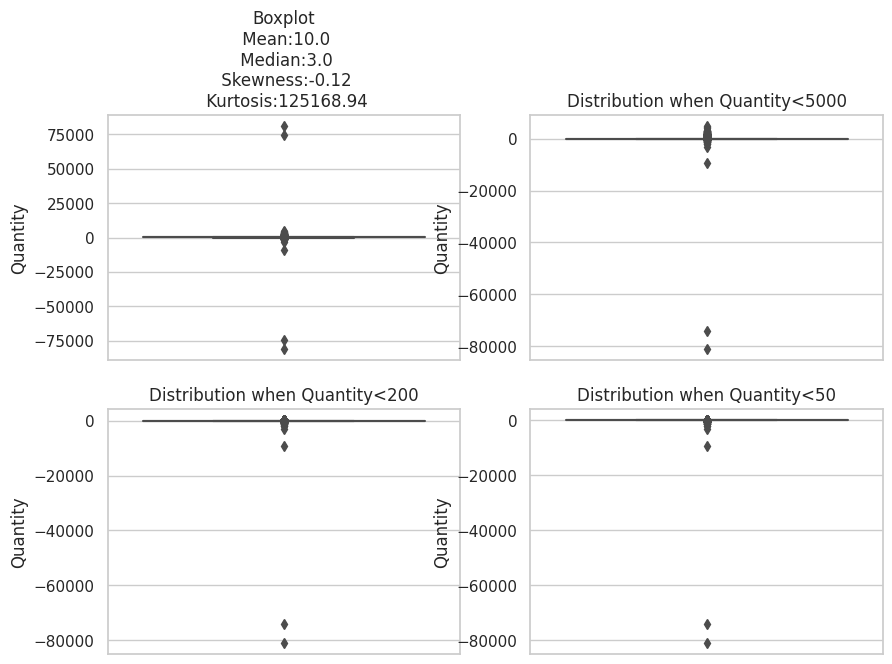

In [51]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7))

skewness = round(df.Quantity.skew(),2)
kurtosis = round(df.Quantity.kurtosis(),2)
mean = round(np.mean(df.Quantity),0)
median = np.median(df.Quantity)

plt.subplot(2,2,1)
sns.boxplot(y=df.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

# Predicting purhase and Customer Lifetime with Machine Learning

Data Preprocessing

In [52]:
#importing the reqired libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
import statsmodels.api as sm



In [53]:
df = df[(df['Quantity']>0)] #Filtering the DataFrame 'df' to select only the rows where the value in the 'Quantity' column is greater than 0.
df = df[(df['UnitPrice']>0)] #Filtering the updated DataFrame 'df' further to select only the rows where the value in the 'UnitPrice' column is greater than 0. This is done using boolean indexing with the condition df['UnitPrice']>0

In [54]:
#Calculating a new column 'Total_Sales' in the DataFrame 'df' by multiplying the values in the 'Quantity' column with the corresponding values in the 'UnitPrice' column. 

df['Total_Sales'] = df['Quantity'] * df['UnitPrice']
necessary_cols = ['InvoiceNo','CustomerID', 'InvoiceDate','Quantity','UnitPrice','Total_Sales']
df = df[necessary_cols]

In [55]:
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"]) #converting the "InvoiceDate" column in the DataFrame "df" to a datetime data type using the "pd.to_datetime()" function from the pandas library.

In [56]:
#adding a new column to the DataFrame "df" called "invoice_month"
df["invoice_month"] = df["InvoiceDate"].apply(lambda x : dt.datetime(x.year,x.month,1))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 279045 to 15017
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524878 non-null  object        
 1   CustomerID     524878 non-null  object        
 2   InvoiceDate    524878 non-null  datetime64[ns]
 3   Quantity       524878 non-null  int64         
 4   UnitPrice      524878 non-null  float64       
 5   Total_Sales    524878 non-null  float64       
 6   invoice_month  524878 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 32.0+ MB


In [58]:
df.dropna(inplace= True)

In [59]:
df.CustomerID.nunique()

4339

In [60]:
#performing cohort analysis, which involves grouping customers based on the month they made their first purchase ("cohort month") and then tracking their subsequent purchases over time.

grouping = df.groupby("CustomerID")["invoice_month"]
df["cohort_month"] = grouping.transform('min')
df


,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Total_Sales,invoice_month,cohort_month
279045,561226,15618,2011-07-26 10:13:00,1,0.001,0.001,2011-07-01,2011-07-01
359871,568200,16198,2011-09-25 14:58:00,1,0.001,0.001,2011-09-01,2011-09-01
157195,550193,13952,2011-04-15 09:27:00,1,0.001,0.001,2011-04-01,2011-04-01
361741,568375,13405,2011-09-26 17:01:00,1,0.001,0.001,2011-09-01,2011-01-01
303023,563503,16488,2011-08-17 09:05:00,200,0.040,8.000,2011-08-01,2011-07-01
...,...,...,...,...,...,...,...,...
268028,560373,n,2011-07-18 12:30:00,1,4287.630,4287.630,2011-07-01,2010-12-01
297723,562955,n,2011-08-11 10:14:00,1,4505.170,4505.170,2011-08-01,2010-12-01
173382,551697,16029,2011-05-03 13:46:00,1,8142.750,8142.750,2011-05-01,2010-12-01
299982,A563185,n,2011-08-12 14:50:00,1,11062.060,11062.060,2011-08-01,2010-12-01


In [61]:
#This function "get_date" takes a DataFrame "df" and a column name "col" as input, and returns three separate arrays - "year", "month", and "day" - representing the year, month, and day components of the dates in the specified column of the DataFrame.

def get_date(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year , month, day

In [62]:
invoice_year , invoice_month, _ = get_date(df,"invoice_month")
cohort_year, cohort_month,_ = get_date(df,"cohort_month")
diff_years = invoice_year - cohort_year
diff_month = invoice_month - cohort_month

#the "get_date" function is used to extract the year, month, and day components from two columns in the DataFrame "df": "invoice_month" and "cohort_month".


In [63]:
df["cohort_index"] =  diff_years * 12 + diff_month +1
#calculating the cohort index for each row in the DataFrame "df" by combining the differences in years and months between the "invoice_month" and "cohort_month" columns, and then adding 1.

In [64]:
grouping = df.groupby(["cohort_month", "cohort_index"])
cohort_data = grouping["CustomerID"].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = "cohort_month", columns= "cohort_index", values = "CustomerID")
cohort_counts.index = cohort_counts.index.strftime("%B %Y")
cohort_counts

#performing cohort analysis on the DataFrame "df" to calculate cohort counts, which represent the number of unique customers in each cohort (grouped by "cohort_month") over time.

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
December 2010,886.0,325.0,287.0,341.0,322.0,353.0,322.0,310.0,314.0,351.0,332.0,446.0,236.0
January 2011,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
February 2011,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
March 2011,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
April 2011,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
May 2011,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
June 2011,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cohort_size = cohort_counts.loc[:,1] #extracting the cohort size for the first cohort index (i.e., the initial month of the cohort) from the "cohort_counts" DataFrame.

In [66]:
retention = cohort_counts.divide(cohort_size, axis= 0)
retention

#This code is calculating the retention rate for each cohort in the "cohort_counts" DataFrame, which represents the proportion of customers from each cohort who made subsequent purchases over time, relative to the initial cohort size.

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
December 2010,1.0,0.366817,0.323928,0.384876,0.363431,0.398420,0.363431,0.349887,0.354402,0.396163,0.374718,0.503386,0.266366
January 2011,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
February 2011,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
March 2011,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
April 2011,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
May 2011,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
monthly_revenue = df.groupby(["CustomerID", "invoice_month"])["Total_Sales"].sum().mean()
lifespan_months = 36
clv_basic = monthly_revenue * lifespan_months
print("Avrage basic CLV  is " + str(round(clv_basic,2)) + " USD")

#calculating the average basic Customer Lifetime Value (CLV) for customers in the "df" DataFrame, assuming a lifespan of 36 months.

Avrage basic CLV  is 29319.35 USD


In [68]:
#calculating the average granular Customer Lifetime Value (CLV) for customers in the "df" DataFrame, based on a more detailed approach that takes into account the average revenue per purchase and the average number of unique invoices per customer per month. The assumed lifespan of a customer is 36 months.



# calculating average revenue per invoice
revenue_per_purchase = df.groupby("InvoiceNo")["Total_Sales"].mean().mean()
# calculating average number of unique invoices customer per month 
freq = df.groupby(["CustomerID", "invoice_month"])["InvoiceNo"].nunique().mean()

lifespan = 36

clv_granular = revenue_per_purchase * freq * lifespan

print("Avrage granular CLV  is " + str(round(clv_granular,2)) + " USD")
print("revenue per purchase is " + str(round(revenue_per_purchase, 2)))
print("Frequency per month is " + str(round(freq, 2)))

Avrage granular CLV  is 3568.99 USD
revenue per purchase is 64.9
Frequency per month is 1.53


In [69]:
#calculating the average traditional Customer Lifetime Value (CLV) for customers in the "df" DataFrame, based on a more traditional approach that takes into account the monthly revenue, retention rate, and churn rate.

monthly_revenue = df.groupby(["CustomerID", "invoice_month"])["Total_Sales"].sum().mean()
retention_rate = retention.iloc[:, 1:].mean().mean()
churn_rate = 1 - retention_rate
clv_readitional = monthly_revenue * (retention_rate / churn_rate)
print("Avrage traditional is " + str(round(clv_readitional, 2)) + " USD" + " at " + str(round(retention_rate*100,2)) + "%")
print("monthly avrage revenue " + str(round(monthly_revenue,2)) + " USD")

Avrage traditional is 273.68 USD at 25.15%
monthly avrage revenue 814.43 USD


# MACHINE LEARNING

Regression Model

In [70]:
df.groupby("invoice_month").size()

invoice_month
2010-12-01    40991
2011-01-01    34060
2011-02-01    26882
2011-03-01    35497
2011-04-01    28882
2011-05-01    35917
2011-06-01    35716
2011-07-01    38395
2011-08-01    34264
2011-09-01    48900
2011-10-01    58537
2011-11-01    82004
2011-12-01    24833
dtype: int64

In [71]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Total_Sales,invoice_month,cohort_month,cohort_index
279045,561226,15618,2011-07-26 10:13:00,1,0.001,0.001,2011-07-01,2011-07-01,1
359871,568200,16198,2011-09-25 14:58:00,1,0.001,0.001,2011-09-01,2011-09-01,1
157195,550193,13952,2011-04-15 09:27:00,1,0.001,0.001,2011-04-01,2011-04-01,1
361741,568375,13405,2011-09-26 17:01:00,1,0.001,0.001,2011-09-01,2011-01-01,9
303023,563503,16488,2011-08-17 09:05:00,200,0.040,8.000,2011-08-01,2011-07-01,2


In [72]:
# building features for customer segmentation

df = df[df["invoice_month"] != "2011-12"]
Now = dt.datetime(2011,12,1)
# Bulid the features
featurs = df.groupby("CustomerID").agg({
    "invoice_month" : lambda x : (Now - x.max()).days,
    "InvoiceNo" : pd.Series.nunique,
    "Total_Sales" : np.sum,
    "Quantity" : ["mean" ,"sum"]
}).reset_index()
featurs.head()

CustomerID invoice_month InvoiceNo Total_Sales      Quantity       
                  <lambda>   nunique         sum          mean    sum
0      12346           334         1    77183.60  74215.000000  74215
1      12347            61         6     4085.18     13.251462   2266
2      12348            91         4     1797.24     75.516129   2341
3      12349            30         1     1757.55      8.643836    631
4      12350           303         1      334.40     11.588235    197

In [73]:
#renaming the columns of the "featurs" DataFrame to more meaningful names
featurs.columns = ["CustomerID", "recency", "frequency", "montary", "quantity_AVG", "quntity_total"]

In [74]:
featurs

,CustomerID,recency,frequency,montary,quantity_AVG,quntity_total
0,12346,334,1,77183.60,74215.000000,74215
1,12347,61,6,4085.18,13.251462,2266
2,12348,91,4,1797.24,75.516129,2341
3,12349,30,1,1757.55,8.643836,631
4,12350,303,1,334.40,11.588235,197
...,...,...,...,...,...,...
4293,18281,183,1,80.82,7.714286,54
4294,18282,122,1,100.21,10.714286,75
4295,18283,30,15,1837.53,1.810730,1215
4296,18287,61,3,1837.28,22.657143,1586


In [75]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Total_Sales,invoice_month,cohort_month,cohort_index
279045,561226,15618,2011-07-26 10:13:00,1,0.001,0.001,2011-07-01,2011-07-01,1
359871,568200,16198,2011-09-25 14:58:00,1,0.001,0.001,2011-09-01,2011-09-01,1
157195,550193,13952,2011-04-15 09:27:00,1,0.001,0.001,2011-04-01,2011-04-01,1
361741,568375,13405,2011-09-26 17:01:00,1,0.001,0.001,2011-09-01,2011-01-01,9
303023,563503,16488,2011-08-17 09:05:00,200,0.040,8.000,2011-08-01,2011-07-01,2


In [76]:
#creating a pivot table called "customerMonthtx" from the "df" DataFrame. 

customerMonthtx = pd.pivot_table(data = df, index=["CustomerID"],
                              values = "InvoiceNo",
                              columns = "invoice_month",
                              aggfunc=pd.Series.nunique, fill_value= 0)


In [77]:
customerMonthtx 

invoice_month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01
CustomerID,,,,,,,,,,,,
12346,0,1,0,0,0,0,0,0,0,0,0,0
12347,1,1,0,0,1,0,1,0,1,0,1,0
12348,1,1,0,0,1,0,0,0,0,1,0,0
12349,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18281,0,0,0,0,0,0,1,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,1,0,0,0
18283,0,2,1,0,1,1,2,2,0,1,1,4


In [78]:
#e "customerMonthtx" DataFrame is used to extract the values of the "2011-11" column, which represents the target variable
cust = ["CustomerID"]
target = ["2011-11"]
y = customerMonthtx[target].values
cols = [cols for cols in featurs.columns if cols not in cust]
X = featurs[cols].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 42)

#the "train_test_split" function from the scikit-learn library is used to split the data into training and testing sets for building a machine learning model.

In [80]:
x_train.shape, x_test.shape #This code is checking the shape (number of rows and columns) of the "x_train" and "x_test" datasets after splitting the data into training and testing sets using the "train_test_split" function.

((3223, 5), (1075, 5))

In [81]:
y_train.shape, y_test.shape #checking the shape (number of rows and columns) of the "y_train" and "y_test" datasets after splitting the data into training and testing sets using the "train_test_split" function

((3223, 1), (1075, 1))

In [82]:

lr = LinearRegression() #creating an instance of the LinearRegression class from the scikit-learn library, which will be used for linear regression modeling

In [83]:
lr.fit(x_train, y_train) #The lr.fit(x_train, y_train) code is fitting the linear regression model to the training data.

LinearRegression()

In [84]:
lr.score(x_train,y_train) #The lr.fit(x_train, y_train) code is fitting the linear regression model to the training data. 

0.6274587859951424

In [85]:
lr.score(x_test,y_test) #lr.score(x_test, y_test) calculates the R-squared score of the linear regression model on the test data

0.5372685246108111

In [86]:
y_pred = lr.predict(x_test)

#y_pred contains the predicted values of the target variable (in this case, the number of unique invoices in November 2011) based on the linear regression model trained on the training data (x_train and y_train), and applied to the test data (x_test). These predicted values are calculated using the trained model's coefficients and intercept.

In [87]:
print("Mean Squared Error for train is : " + str(np.sqrt(mean_squared_error(y_train, lr.predict(x_train)))))
print("Mean Squared Error for test is : " + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Mean Absolute Error for train is : " + str(mean_absolute_error(y_train, lr.predict(x_train))))
print("Mean Absolute Error test is : " + str(mean_absolute_error(y_test, y_pred)))
print("R2 Score is : " +str(r2_score(y_test,y_pred)))

Mean Squared Error for train is : 0.8030347839331538
Mean Squared Error for test is : 2.499768382166666
Mean Absolute Error for train is : 0.524225333189505
Mean Absolute Error test is : 0.6066806216595947
R2 Score is : 0.5372685246108111


Visualising the above output graphically

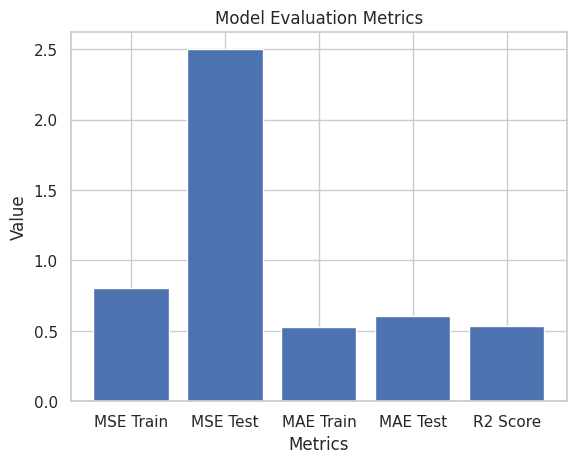

In [88]:
#Visualising the above output graphically

# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, lr.predict(x_train)))
mse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_train = mean_absolute_error(y_train, lr.predict(x_train))
mae_test = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create bar plot
metrics = ['MSE Train', 'MSE Test', 'MAE Train', 'MAE Test', 'R2 Score']
values = [mse_train, mse_test, mae_train, mae_test, r2]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()
